In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from housing_utils import read_housing
import sqlite3

In [16]:
l = []
for i in range(1, 23):
    print("Reading %d" % i)
    l.append(read_housing("../olx/houses%d.jl" % i))


Reading 1
Reading 2
Reading 3
Reading 4
Reading 5
Reading 6
Reading 7
Reading 8
Reading 9
Reading 10
Reading 11
Reading 12
Reading 13
Reading 14
Reading 15
Reading 16
Reading 17
Reading 18
Reading 19
Reading 20
Reading 21
Reading 22


In [17]:
ids = [set(x for x in e["nr_anunt"]) for e in l]
dates = [e["date"][0] for e in l]

In [18]:
len(ids[0].intersection(ids[1]))

2461

In [19]:
diffs = []
for i in range(1):
    print("Size of set %d: %d" % (i, len(ids[i])))
    for j in range(len(ids)):
        intersect = ids[i].intersection(ids[j])
        diffs.append(len(intersect))
        print("Size of set %d intersected with %d: %d" % (i, j, len(intersect)))
        

Size of set 0: 2551
Size of set 0 intersected with 0: 2551
Size of set 0 intersected with 1: 2461
Size of set 0 intersected with 2: 2390
Size of set 0 intersected with 3: 2345
Size of set 0 intersected with 4: 2300
Size of set 0 intersected with 5: 2268
Size of set 0 intersected with 6: 2220
Size of set 0 intersected with 7: 2170
Size of set 0 intersected with 8: 2122
Size of set 0 intersected with 9: 2038
Size of set 0 intersected with 10: 2003
Size of set 0 intersected with 11: 1985
Size of set 0 intersected with 12: 1957
Size of set 0 intersected with 13: 1915
Size of set 0 intersected with 14: 1871
Size of set 0 intersected with 15: 1842
Size of set 0 intersected with 16: 1814
Size of set 0 intersected with 17: 1800
Size of set 0 intersected with 18: 1769
Size of set 0 intersected with 19: 1729
Size of set 0 intersected with 20: 1702
Size of set 0 intersected with 21: 1671


In [20]:
news = []
for i in range(len(ids)-1):
    print("Size of set %d: %d" % (i, len(ids[i])))
    n = ids[i+1].difference(ids[i])
    print("New in set %d compared to %d: %d" % (i+1, i, len(n)))
    news.append(len(n))

Size of set 0: 2551
New in set 1 compared to 0: 102
Size of set 1: 2563
New in set 2 compared to 1: 57
Size of set 2: 2535
New in set 3 compared to 2: 42
Size of set 3: 2517
New in set 4 compared to 3: 83
Size of set 4: 2536
New in set 5 compared to 4: 75
Size of set 5: 2550
New in set 6 compared to 5: 94
Size of set 6: 2564
New in set 7 compared to 6: 52
Size of set 7: 2550
New in set 8 compared to 7: 101
Size of set 8: 2572
New in set 9 compared to 8: 85
Size of set 9: 2542
New in set 10 compared to 9: 75
Size of set 10: 2542
New in set 11 compared to 10: 128
Size of set 11: 2585
New in set 12 compared to 11: 100
Size of set 12: 2611
New in set 13 compared to 12: 87
Size of set 13: 2617
New in set 14 compared to 13: 93
Size of set 14: 2622
New in set 15 compared to 14: 65
Size of set 15: 2624
New in set 16 compared to 15: 48
Size of set 16: 2620
New in set 17 compared to 16: 48
Size of set 17: 2626
New in set 18 compared to 17: 203
Size of set 18: 2700
New in set 19 compared to 18: 8

(736730.85, 736756.15, 1, 2595.0)

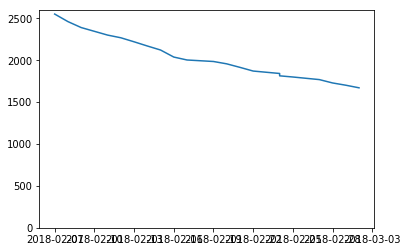

In [21]:
plt.plot(dates, diffs)
plt.axis(ymin=1)

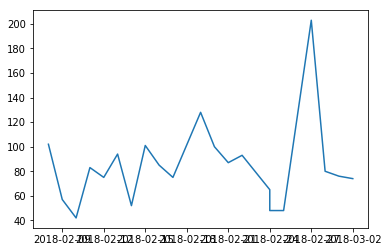

In [22]:
plt.plot(dates[1:], news)

In [23]:
sum(news)

1768

In [24]:
e = l[3]

In [25]:
e.head()

,An constructie,Camere,Compartimentare,Etaj,Locuinta mobilata / utilata,Oferit de,Suprafata utila,adaugat_la,date,nr_anunt,price,text,title,type,url
0,NaN,4 sau mai multe,NaN,NaN,NaN,Agentie,270 m²,,2018-02-10,133148417,65500.0,Casa bine amplasata in Bors pe un teren extrem...,Casa 270 mp Utili teren dublu front stradal 1...,Case de vanzare Oradea,https://www.olx.ro/oferta/casa-270-mp-utili-te...
1,NaN,3 camere,NaN,NaN,Nemobilata / neutilata,Proprietar,500 m²,,2018-02-10,138811457,87000.0,Vind casa strada ronald regan zona horea parc ...,Vind casa,Case de vanzare Oradea,https://www.olx.ro/oferta/vind-casa-ID9orct.html
2,NaN,3 camere,NaN,NaN,NaN,Agentie,76 m²,,2018-02-10,152891235,145000.0,RE/MAX Family va propune spre vanzare in mod e...,Casă cu 3 camere zona Central,Case de vanzare Oradea,https://www.olx.ro/oferta/casa-cu-3-camere-zon...
3,NaN,4 sau mai multe,NaN,NaN,NaN,Proprietar,NaN,,2018-02-10,149056683,89000.0,"Teren 521 m patrati, casa are 131 m parati con...",Casa de vanzare sanmartin,Case de vanzare Oradea,https://www.olx.ro/oferta/casa-de-vanzare-sanm...
4,NaN,3 camere,NaN,NaN,Nemobilata / neutilata,Proprietar,150 m²,,2018-02-10,140234985,23000.0,vand casa in sat Corbesti 150 metri patrati pl...,Casa plus teren 2.5ha langa casa,Case de vanzare Oradea,https://www.olx.ro/oferta/casa-plus-teren-2-5h...


In [26]:
for e in l:
    e.to_sql("olx_houses", sqlite3.connect("./olx_houses.db"), if_exists='append')

/home/rolisz/.local/share/virtualenvs/housing-73v4RTTc/lib/python3.5/site-packages/pandas/core/generic.py:1534: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


SQL Queries
======

Consecutive day diffs:
SELECT olx_houses.date, oh.date, COUNT(*) FROM olx_houses JOIN olx_houses as oh ON olx_houses.nr_anunt = oh.nr_anunt WHERE olx_houses.date = "2018-02-07 00:00:00" group by olx_houses.date, oh.date; 

Sum of new ones:


